In [20]:
import cv2
import numpy as np
from datetime import datetime
from PIL import Image
import matplotlib.pyplot as plt

In [47]:
frame = Image.open("placa 2.jpg")
gray = np.array(frame.convert("L"))



In [48]:
def detect_circle(gray_image,radius:tuple=(200,210)):

    gray_blur = cv2.GaussianBlur(gray_image, (9, 9), 2)

    circles = cv2.HoughCircles(
        gray_blur,
        cv2.HOUGH_GRADIENT,
        dp=1.2,
        minDist=100,
        param1=100,
        param2=30,
        minRadius=radius[0],   
        maxRadius=radius[1]    
    )

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")

        circles = sorted(circles, key=lambda x: x[2], reverse=True)

        x, y, r = circles[0]
        cv2.circle(gray_image, (x, y), r, (0, 255, 0), 4)  
        cv2.circle(gray_image, (x, y), 2, (0, 0, 255), 3) 

    
    plt.imshow(gray_image,cmap='gray')
    plt.show()

    mask = np.zeros_like(gray_image)

    cv2.circle(mask, (x, y), r, (255, 255, 255), -1)

    masked = cv2.bitwise_and(gray_image, mask)

    plt.imshow(masked,cmap='gray')

    return masked


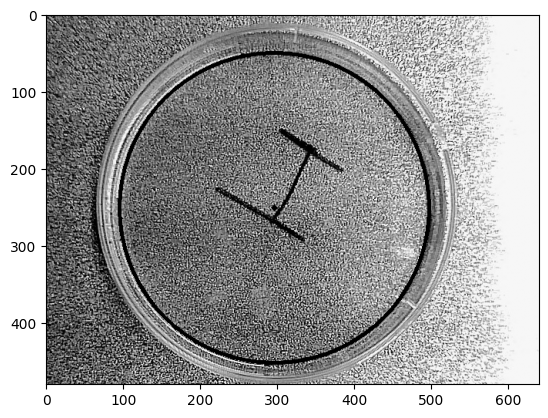

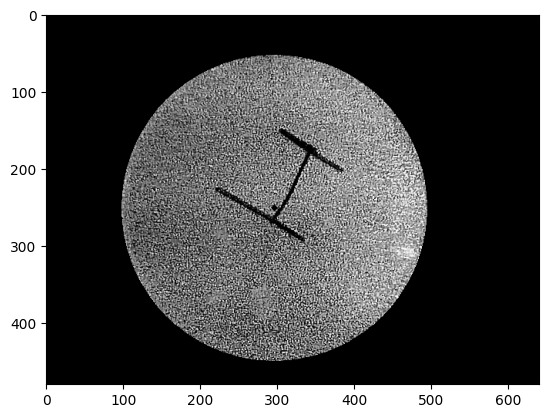

In [23]:
area=detect_circle(gray)

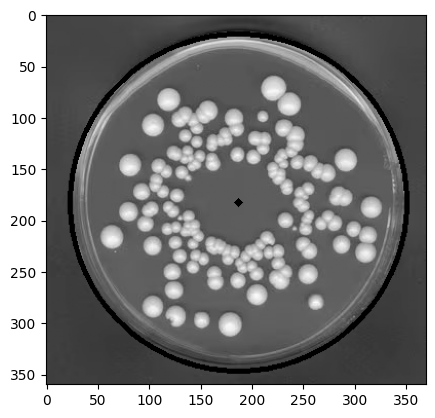

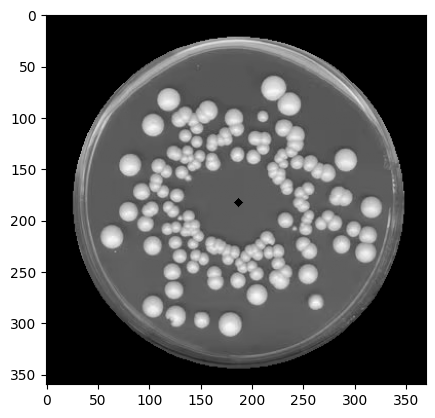

In [52]:
frame2 = Image.open("placa real.jpg")
gray2 = np.array(frame2.convert("L"))
area2 = detect_circle(gray2,radius=(0,180))

0.1580735851362914


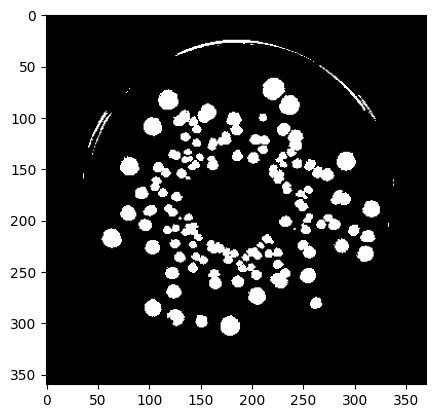

In [53]:
extreme = area2>180
print(np.count_nonzero(extreme)/np.count_nonzero(area2))
plt.imshow(extreme,cmap='gray')